#EXERCISE 8.1 and 8.2

###Evaluation of an Hamiltonian expected value using simulated annealing algorithms

The objective is the evaluation of:

$$
\langle {\hat H} \rangle_T =
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} =
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

for a trial wavefunction:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}$$

with:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Therefore, in order to compute $⟨\hat H⟩$, anlaytical derivation of the wavefunction must be calculated:


$$
\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{{\big(-\frac{\hbar^2}{2 m} \frac{\partial^2}{\partial x^2}} + V(x)\big) \Psi_T(x)}{\Psi_T(x)}
$$

obtaining, for the second derivative:

$$
-\frac{\hbar^2}{2 m} \frac{\partial^2}{\partial x^2} = \frac{1}{σ^2}[(\frac{x - μ}{σ^2} - 1)e^{-\frac{x - μ}{2σ^2}} + (\frac{x + μ}{σ^2} - 1)e^{-\frac{x + μ}{2σ^2}}]
$$

The best value (minimum) of $⟨\hat H⟩$ can be found for the parameters $σ$ and $μ$ by exploring the space (σ, μ) accepting or rejecting every step with a probability dependent on "Temperature" $P = e^{\frac{⟨\hat H⟩|_{σ, μ} - ⟨\hat H⟩|_{σ', μ'}}{T}}$, i.e. with a simulated annealing algorithm

For my simulation, I chose as a starting point in the $(\sigma, \mu)$ space (1., 2.).

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_tot = pd.read_csv("output_dump_SA.dat", delim_whitespace=True)

#filter only for accepted steps
df_accepted = df_tot[df_tot['acceptance'] == 1]

 #errors can happen around zero!
df_accepted['mu'] = pd.to_numeric(df_accepted['mu'], errors='coerce')
df_accepted['sigma'] = pd.to_numeric(df_accepted['sigma'], errors='coerce')
df_accepted = df_accepted.dropna(subset=['mu', 'sigma'])
df_accepted

,T,sigma,mu,H_value,error,acceptance
0,1.00,2.000000,1.000000,11.737100,1.074660,1.0
4,1.00,1.967550,0.987535,11.737100,1.160460,1.0
6,1.00,1.941910,0.983232,12.037400,1.077270,1.0
7,1.00,1.894200,0.946859,11.282900,0.970988,1.0
8,1.00,1.891560,0.910106,10.070500,1.166220,1.0
...,...,...,...,...,...,...
9993,0.01,0.693991,0.705674,-0.411282,0.009715,1.0
9994,0.01,0.689438,0.737045,-0.397116,0.014328,1.0
9995,0.01,0.695039,0.777930,-0.399620,0.011866,1.0
9998,0.01,0.655452,0.728116,-0.420816,0.006232,1.0


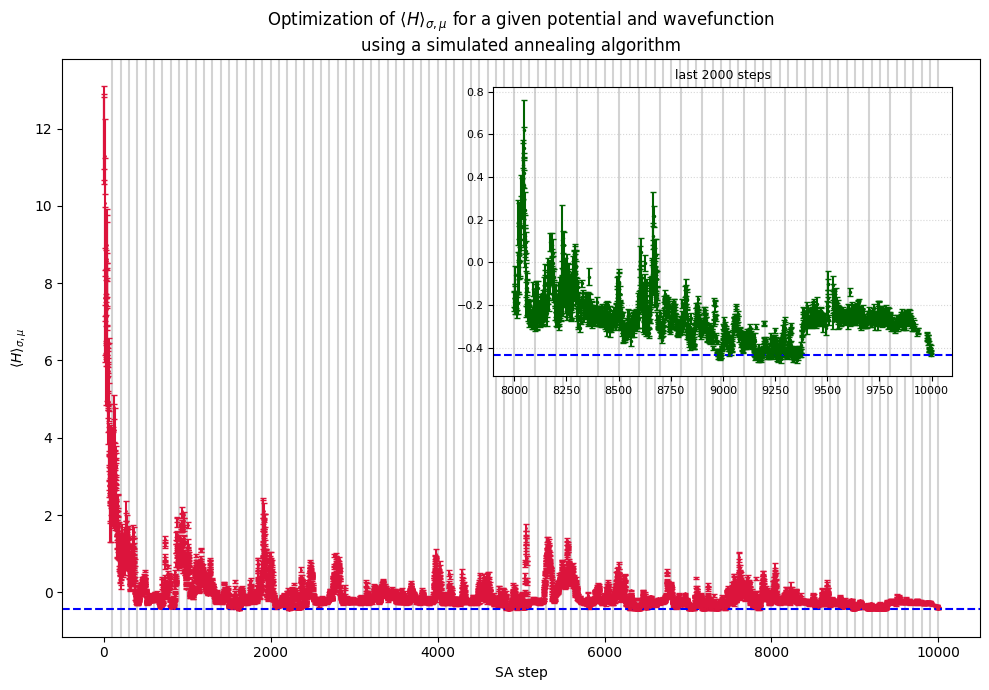

In [50]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#plot H estimation:
fig, ax = plt.subplots(1,1,figsize=(10, 7))
ax.errorbar(x=df_accepted.index, y=df_accepted['H_value'], yerr=df_accepted['error'], fmt='o', markersize = 1, capsize=2, color='crimson')

ax.set(xlabel='SA step', ylabel = r'$\langle H \rangle _{\sigma, \mu}$',
       title = r'Optimization of $\langle H \rangle _{\sigma, \mu}$ for a given potential and wavefunction'+'\n'+'using a simulated annealing algorithm')

for i in np.arange(100, len(df_tot), 100): ax.axvline(i, color = 'lightgrey', zorder = 0)
ax.axhline(list(df_accepted['H_value'])[-1], linestyle = '--', color='blue')


inset_ax = inset_axes(ax, width="50%", height="50%", loc='upper right', borderpad=2)

zoom_data = df_accepted.loc[8000:]

inset_ax.errorbar(x=zoom_data.index, y=zoom_data['H_value'], yerr=zoom_data['error'],
                  fmt='o', markersize=1.5, capsize=2, color='darkgreen')

inset_ax.set_title("last 2000 steps", fontsize=9)
for i in np.arange(8000, 10000, 100): inset_ax.axvline(i, color = 'lightgrey', zorder = 0)
inset_ax.axhline(list(df_accepted['H_value'])[-1], linestyle = '--', color='blue')
inset_ax.tick_params(axis='both', labelsize=8)

inset_ax.yaxis.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()
plt.close()

As we can see, the algorithm effectively function slowly reaching its optimal point. We can also see that the entity of the fluctuations decreases as the temperature drops.

One peculiar observation we can make is that the last point found is not exactly the minimum found, but it is very close. This is because the probability of making a step uphill isn't zero, even if it decreases with temperature, which is what happens around step 9300. Even so, we can see that the actual optimum is almost recovered by the end of the simulation.

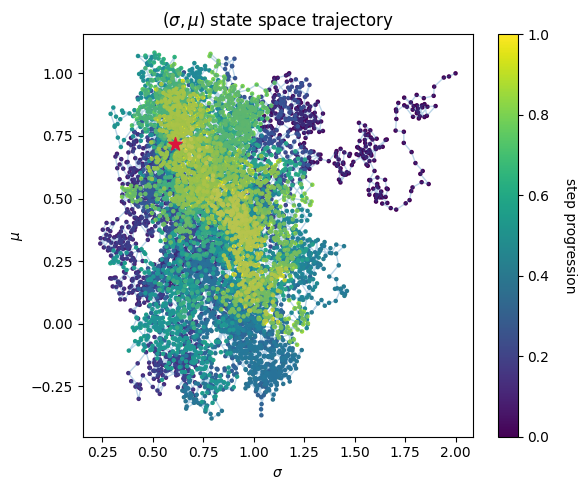

In [56]:
#plot trajectory:
fig, ax = plt.subplots(1,1,figsize=(6,5))

colors = np.linspace(0, 1, len(df_accepted))

ax.plot(df_accepted['sigma'], df_accepted['mu'], linewidth = 1, alpha = 0.3)
scatter = ax.scatter(df_accepted['sigma'], df_accepted['mu'], s = 5, c = colors)
ax.scatter(df_accepted['sigma'].iloc[-1], df_accepted['mu'].iloc[-1], s = 100, marker='*', c = 'crimson', zorder = 100)
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

ax.set(xlabel=r'$\sigma$', ylabel = r'$\mu$',
       title = r'$(\sigma, \mu)$ state space trajectory')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('step progression', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()
plt.close()

In this plot we can see the SA algorithm starts relatively far from the minimum (as we could see from the initial high values of the energy) and rather fastly directs itself towards a more optimal region of the energy landscape.


We can see below the integration value of the energy obtained with parameters found in the last SA step. Integration was performed on samples obtained with a metropolis algorithm, fine tuned with step $δ = 2$ so that an acceptance of around 50% ($±10) is obtained.

The integral was computed with the blocking methods, with 10000 points in 100 blocks

[Text(0.5, 0, 'number of blocks'),
 Text(0, 0.5, 'integration value'),
 Text(0.5, 1.0, 'Result of the integration of $\\langle H \\rangle _{\\sigma, \\mu}$\nwith optimal values (0.609664,0.71889)')]

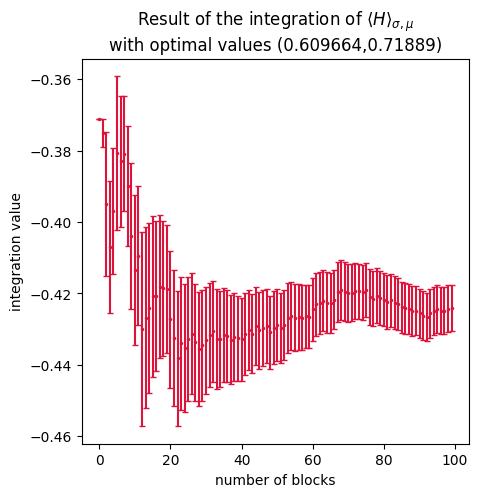

In [57]:
#plot the final integral:
df = pd.read_csv("output_integral.dat", delim_whitespace=True, header=None, names=['H', 'error'])

fig, ax = plt.subplots(1,1,figsize=(5, 5))

ax.errorbar(x=range(len(df)), y=df['H'], yerr=df['error'], fmt='o', markersize=1.5, capsize=2, color='crimson')
mytitle = r'Result of the integration of $\langle H \rangle _{\sigma, \mu}$' + "\n" + 'with optimal values (' + str(df_accepted['sigma'].iloc[-1]) + "," + str(df_accepted['mu'].iloc[-1]) + ")"
ax.set(xlabel = 'number of blocks', ylabel = 'integration value', title = mytitle)

Finally, we can confirm that the metropolis sampling of the wavefunction probability density $|\Psi_T(x)|^2$</span> actually reflects the theory:

Ground state energy:  -0.46046587969271563


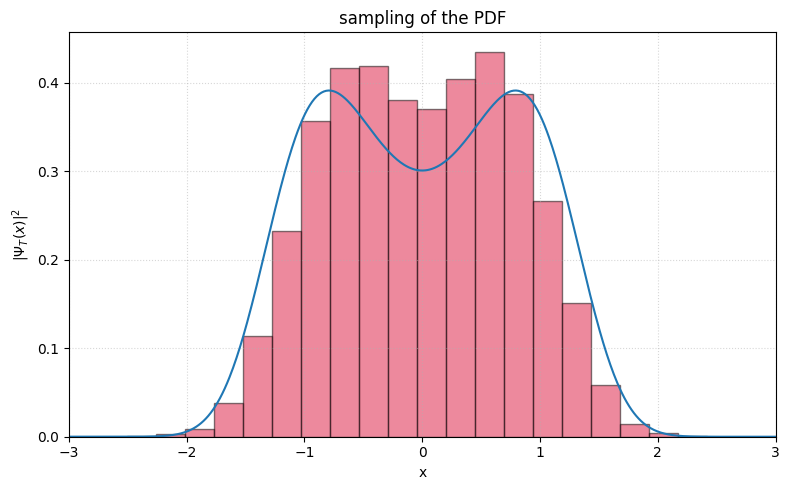

In [60]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal,
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])


df = pd.read_csv("samples.dat", delim_whitespace=True, header=None)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df[0], bins=20, color='crimson', edgecolor='black', alpha=0.5, density=True)
ax.plot(x,(psi[0])**2)
ax.set(xlabel = 'x', ylabel = r'$|\Psi_T(x)|^2$', title = 'sampling of the PDF', xlim = [-3,3])

plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()